In [22]:
import warnings;
import pandas as pd;
import matplotlib.pyplot as plt;

warnings.filterwarnings("ignore");

In [23]:
data_set = pd.read_csv("Different_stores_dataset.csv");

In [54]:
# 1. Check missing values and duplicate records
print("Missing Values: ")
print(data_set.isnull().sum())
print("\nDuplicate Records:", data_set.duplicated().sum())

Missing Values: 
invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
Total Sales               0
Total Cost                0
Total Profit              0
dtype: int64

Duplicate Records: 0


In [55]:
# 2. Add column name 'Total Sales'
data_set['Total Sales'] = data_set['quantity'] * data_set['selling_price_per_unit']
data_set

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,7126.9000,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,4861.3770,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,295.0600,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,14503.8250,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,181.8000,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,219.9375,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,14.6440,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,14.6440,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,15120.0000,1680.0000


In [56]:
# 3. How many customers have age more than 60?
unique_customers = data_set[['customer_id', 'age']].drop_duplicates()
customers_over_60 = unique_customers[unique_customers['age'] > 60]
print("Customers age over 60:", len(customers_over_60))

Customers age over 60: 17169


In [57]:
# 4. How many unique customer_id entries are there? Do any customers make multiple purchases?
customer_unique_count = data_set['customer_id'].nunique()
customer_having_multiple_purchases = data_set['customer_id'].value_counts().gt(1).sum()
print("Unique Customers:", customer_unique_count)
print("Customers with multiple purchases:", customer_having_multiple_purchases)

Unique Customers: 99457
Customers with multiple purchases: 0


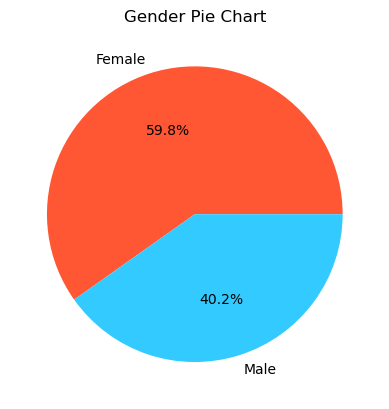

In [58]:
# 5. Are there more male or female customers, Show in Pie Chart?
all_gender_counts = data_set['gender'].value_counts()
plt.pie(all_gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff5733', '#33caff'])
plt.title('Gender Pie Chart')
plt.show()

In [59]:
# 6. Which category is least popular among customers?
least_popular_category = data_set['category'].value_counts().idxmin()
print("Least Popular Category Among Customers:", least_popular_category)

Least Popular Category Among Customers: Books


In [60]:
# 7. Which category has the highest sales volume?
category_sales_volume = data_set.groupby('category')['Total Sales'].sum()
print("Highest Sales Category:", category_sales_volume.idxmax())

Highest Sales Category: Clothing


In [61]:
# 8. Add column name 'Total Profit'
data_set['Total Cost'] = data_set['quantity'] * data_set['cost_price_per_unit']
data_set['Total Profit'] = data_set['Total Sales'] - data_set['Total Cost']
data_set

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Cost,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,7126.9000,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,4861.3770,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,295.0600,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,14503.8250,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,181.8000,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,219.9375,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,14.6440,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,14.6440,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,15120.0000,1680.0000


In [70]:
# 9. Display the top 10 invoices with the highest quantities sold?
top_10_invoices = data_set.nlargest(10, 'quantity')[['invoice_no', 'quantity']]
print("Top 10 Invoices by Quantity:")
print(top_10_invoices)

Top 10 Invoices by Quantity:
    invoice_no  quantity
100    I283443        15
109    I293215        12
275    I282789        12
305    I115679        11
61     I207205        10
129    I160221        10
224    I353272        10
201    I286193         9
11     I139207         8
145    I246375         8


In [71]:
# 10. Which payment method is most commonly used?
common_payment_method = data_set['payment_method'].value_counts().idxmax()
print("Commonly Used Payment Method:", common_payment_method)

Commonly Used Payment Method: Cash


In [72]:
# 11. Total Sales with respect to region?
total_region_sales = data_set.groupby('region')['Total Sales'].sum()
print("Total Sales by Region:")
print(total_region_sales)

Total Sales by Region:
region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64


In [73]:
# 12. Sort Malls with average sales higher to lower?
mall_avg_sales_lower_to_higher = data_set.groupby('shopping_mall')['Total Sales'].mean().sort_values(ascending=False)
print("Malls Average Sales From Higher To Lower:")
print(mall_avg_sales_lower_to_higher)

Malls Average Sales From Higher To Lower:
shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64


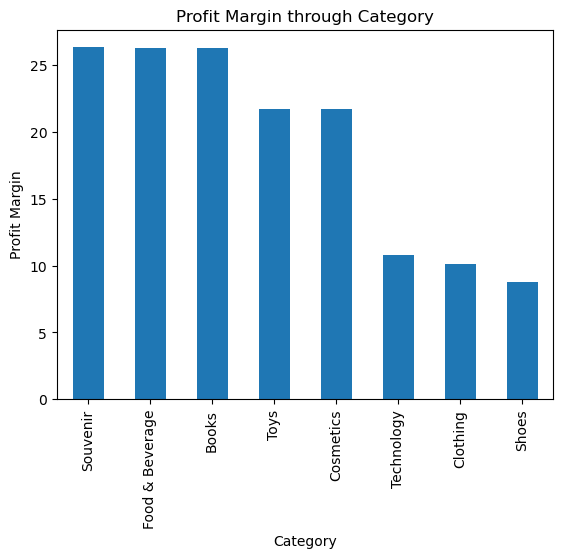

In [66]:
# 13. Sort categories with the highest profit margins display in bar plot?
category_profit = data_set.groupby('category')['Total Profit'].sum()
category_sales_total = data_set.groupby('category')['Total Sales'].sum()
profit_margin = (category_profit / category_sales_total) * 100
profit_margin.sort_values(ascending=False).plot(kind='bar')
plt.title('Profit Margin through Category')
plt.ylabel('Profit Margin')
plt.xlabel('Category')
plt.show()

In [74]:
# 14. What is the total number of transactions per region for each payment method?
all_transactions = data_set.groupby(['region', 'payment_method'])['invoice_no'].count()
print("Total Transactions per Region and Payment Method:")
print(all_transactions)

Total Transactions per Region and Payment Method:
region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
Name: invoice_no, dtype: int64


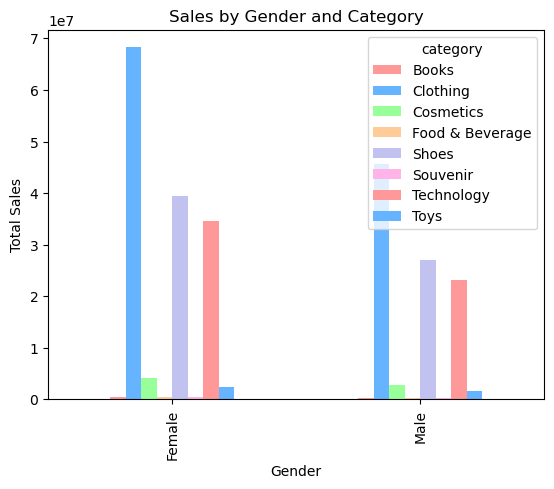

In [75]:
# 15. How do sales in different categories compare between males and females?
gender_category_sales = data_set.groupby(['gender', 'category'])['Total Sales'].sum().unstack()
gender_category_sales.plot(kind='bar', stacked=False, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Sales by Gender and Category')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.show()